<br> </br>
<font color='darkred' size = 7.5> <center>  <b> Quantitative strategies on high-frequency data </b> </center> </font>
<font color='darkred' size = 5> <center>  4. Constructing a strategy setup using different entry/exit techniques </center> </font>


# Exercises 4

Perform a similar analysis for two other symbols.

# Exercise 4.1

* Prepare a separate dataframe including close prices of two selected assets
* fill missing values with the last non-missing observation
* Assume you are excluding the first and last 10 minutes of the session (9:31-9:40 and 15:51-16:00) - delete the data for this period (place NAs in the data)

In [1]:
# place for solution of Exercise 4.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
data_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/US_stocks.csv"

dataUSA = pd.read_csv(data_url,
                      parse_dates = ["timestamp"],
                      index_col = "timestamp")
dataUSA.head(2)


,open_AAPL,high_AAPL,low_AAPL,close_AAPL,volume_AAPL,open_META,high_META,low_META,close_META,volume_META,...,open_MA,high_MA,low_MA,close_MA,volume_MA,open_V,high_V,low_V,close_V,volume_V
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-02 09:31:00,248.3506,248.4105,247.4327,247.6023,1245220,588.7706,591.9455,588.1616,591.9156,209802.0,...,526.1993,526.1993,523.6041,524.7426,48309.0,316.7216,316.9708,316.1435,316.8013,122361.0
2025-01-02 09:32:00,247.6672,248.5202,246.7044,247.0636,463134,591.7708,591.9905,589.9987,591.6660,36859.0,...,525.0856,525.1453,523.6538,523.6538,7293.0,316.9658,317.0405,316.0440,316.4724,17787.0


<Axes: xlabel='timestamp'>

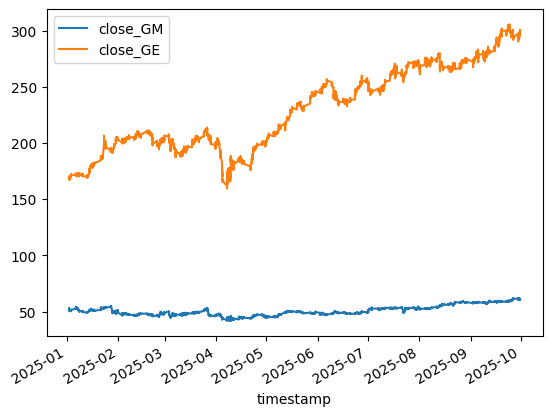

In [7]:
dataUSA_close = dataUSA.filter(like = "close_").copy()

# fill missing close prices with the last non-missing value
dataUSA_close.ffill(inplace = True)

# and create a separate dataframe with just close prices of APPL and META
dataUSA_GM_GE = dataUSA_close[['close_GM', 'close_GE']].copy()

dataUSA_GM_GE.plot()

In [8]:
# 4.1.3 Assuming : excluding the first and last 10 minutes of the session
dataUSA_GM_GE = dataUSA_GM_GE.copy()
dataUSA_GM_GE.loc[dataUSA_GM_GE.between_time("09:31", "09:40").index] = np.nan
dataUSA_GM_GE.loc[dataUSA_GM_GE.between_time("15:51", "16:00").index] = np.nan


In [9]:
dataUSA_GM_GE.between_time("15:51", "16:00").head(20)

,close_GM,close_GE
timestamp,,
2025-01-02 15:51:00,NaN,NaN
2025-01-02 15:52:00,NaN,NaN
2025-01-02 15:53:00,NaN,NaN
2025-01-02 15:54:00,NaN,NaN
2025-01-02 15:55:00,NaN,NaN
2025-01-02 15:56:00,NaN,NaN
2025-01-02 15:57:00,NaN,NaN
2025-01-02 15:58:00,NaN,NaN
2025-01-02 15:59:00,NaN,NaN


array([[<Axes: xlabel='time'>],
       [<Axes: xlabel='time'>]], dtype=object)

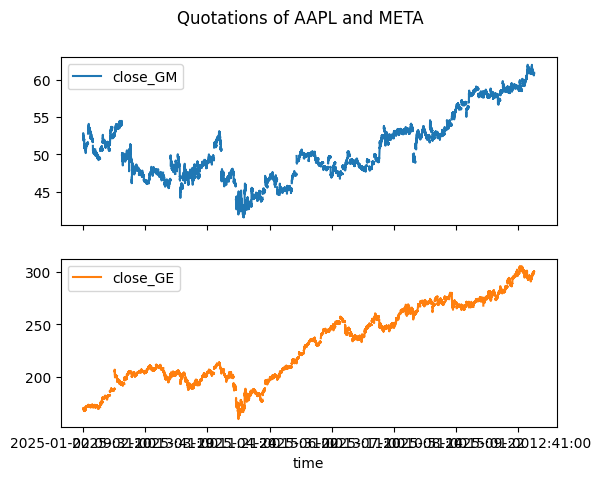

In [10]:
dataUSA_GM_GE_plot = dataUSA_GM_GE.copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index.astype(str)

# Reset the index so that 'time' is a column
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop = True)

# Set time as the X-axis and plot the charts
dataUSA_GM_GE_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 1),
    title = "Quotations of AAPL and META"
)

In [11]:
# 4.1.2 Filling missing values
# lets assume that we need atleast 25% of the missing values
dataUSA_GM_GE['close_GM_SMA20'] = dataUSA_GM_GE['close_GM'].rolling(window = 20, min_periods = 10).mean()
# dataUSA_GM_GE['close_GM_SMA20'] = dataUSA_GM_GE['close_GM_SMA20'].where(~dataUSA_GM_GE['close_GM'].isna(), np.nan)


In [12]:
# dataUSA_GM_GE['close_GM_SMA20'].head(10)
dataUSA_GM_GE.iloc[-240:-230]


,close_GM,close_GE,close_GM_SMA20
timestamp,,,
2025-09-30 12:01:00,61.0100,298.455,61.001000
2025-09-30 12:02:00,60.9997,298.570,61.000485
2025-09-30 12:03:00,60.9856,298.350,60.999515
2025-09-30 12:04:00,60.9250,297.965,60.996765
2025-09-30 12:05:00,60.9000,297.740,60.992765
2025-09-30 12:06:00,60.8500,298.050,60.987015
2025-09-30 12:07:00,60.8100,298.230,60.977015
2025-09-30 12:08:00,60.8106,298.165,60.968045
2025-09-30 12:09:00,60.8100,298.260,60.960045


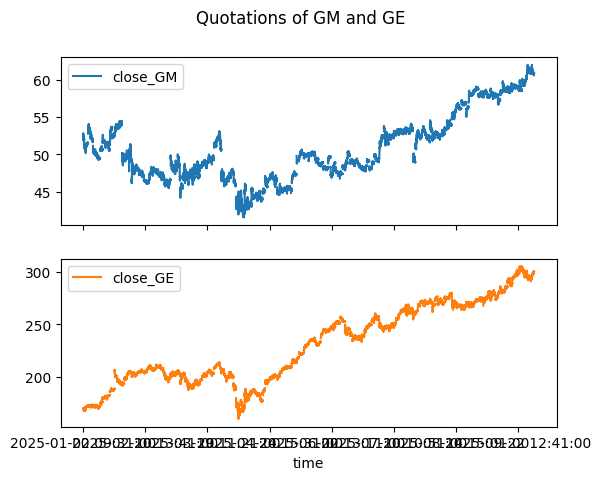

In [13]:
# Lets see the effect on the plot
dataUSA_GM_GE_plot = dataUSA_GM_GE[['close_GM', 'close_GE']].copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index.astype(str)

# Reset the index so that 'time' is a column
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop = True)

# Set time as the X-axis and plot the charts
dataUSA_GM_GE_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 1),
    title = "Quotations of GM and GE"
)

plt.show()

# Exercise 4.2

Prepare a strategy framework based on the intersection of price and a single moving average (SMA or EMA).

* Choose your own parameters.
* Plot the results of your calculations on a chart (for the first 5 days).

In [14]:
dataUSA_GM_GE['close_GM'].iloc[-240:-230]

timestamp
2025-09-30 12:01:00    61.0100
2025-09-30 12:02:00    60.9997
2025-09-30 12:03:00    60.9856
2025-09-30 12:04:00    60.9250
2025-09-30 12:05:00    60.9000
2025-09-30 12:06:00    60.8500
2025-09-30 12:07:00    60.8100
2025-09-30 12:08:00    60.8106
2025-09-30 12:09:00    60.8100
2025-09-30 12:10:00    60.8400
Name: close_GM, dtype: float64

In [ ]:
# place for solution of Exercise 4.2
# Create EMA 

dataUSA_GM_GE['close_GM_EMA10'] = dataUSA_GM_GE['close_GM'].ewm(span = 10, min_periods = 5).mean()

dataUSA_GM_GE['close_GM_EMA10'] = dataUSA_GM_GE['close_GM_EMA10'].where(
    ~dataUSA_GM_GE['close_GM'].isna(), np.nan)

dataUSA_GM_GE.iloc[-20:-10]


,close_GM,close_GE,close_GM_SMA20,close_GM_EMA10
timestamp,,,,
2025-09-30 15:41:00,60.790,299.9550,60.71625,60.783218
2025-09-30 15:42:00,60.775,299.9900,60.72500,60.781724
2025-09-30 15:43:00,60.765,299.9450,60.73375,60.778683
2025-09-30 15:44:00,60.810,300.3850,60.74475,60.784377
2025-09-30 15:45:00,60.785,300.2703,60.75400,60.784490
2025-09-30 15:46:00,60.765,300.2850,60.76025,60.780947
2025-09-30 15:47:00,60.795,300.7200,60.76750,60.783502
2025-09-30 15:48:00,60.780,300.6700,60.77475,60.782865
2025-09-30 15:49:00,60.840,300.6050,60.78375,60.793253


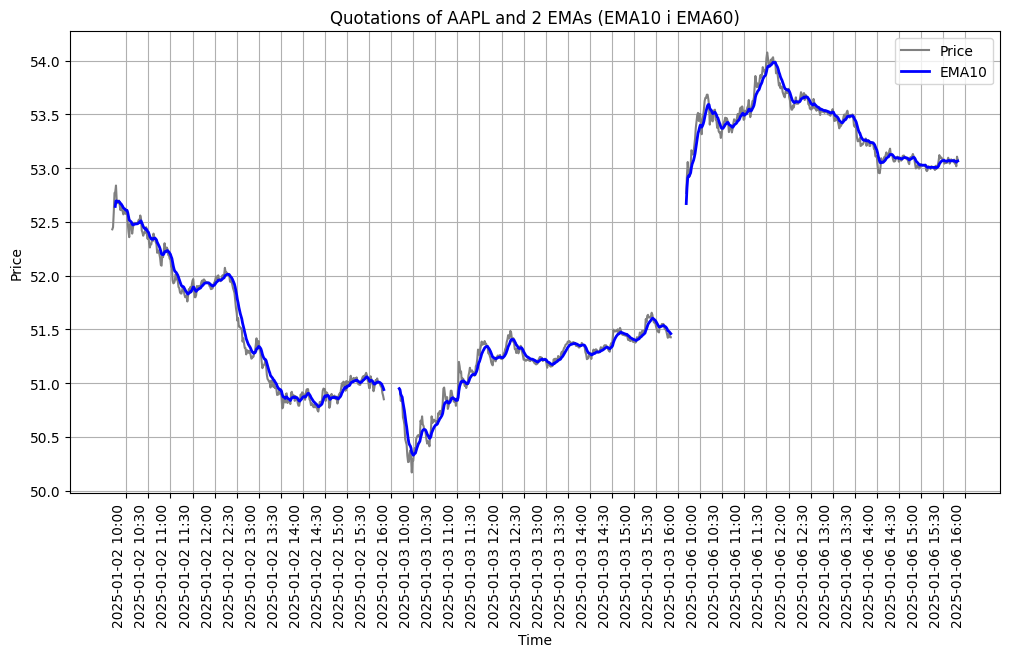

In [ ]:
dataUSA_GM_GE_plot = dataUSA_GM_GE[['close_GM','close_GM_EMA10',]].copy()

dataUSA_GM_GE_plot['time'] = dataUSA_GM_GE_plot.index
end_date = dataUSA_GM_GE_plot.index.min() + pd.Timedelta(days = 5)
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.loc[:end_date]

# DEBUGGED 
dataUSA_GM_GE_plot = dataUSA_GM_GE_plot.reset_index(drop=True)

plt.figure(figsize = (12, 6))
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM'], 
         label = 'Price', 
         color='gray')
plt.plot(dataUSA_GM_GE_plot.index, 
         dataUSA_GM_GE_plot['close_GM_EMA10'], 
         label = 'EMA10', 
         color = 'blue',  
         linewidth = 2)

tick_mask = dataUSA_GM_GE_plot['time'].dt.minute % 30 == 0
xticks = dataUSA_GM_GE_plot.index[tick_mask]
xticklabels = dataUSA_GM_GE_plot['time'][tick_mask].dt.strftime('%Y-%m-%d %H:%M')
plt.xticks(ticks = xticks, labels = xticklabels, rotation = 90, ha = 'right')

plt.title("Quotations of AAPL and 2 EMAs (EMA10 i EMA60)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Exercise 4.3

Prepare a strategy framework based on the intersection of two moving **medians**.

* Choose your own parameters.
* Plot the calculation results on a chart (for the first 5 days).

In [ ]:
# place for solution of Exercise 4.3

# Exercise 4.4

Prepare a strategy framework based on a volatility breakout model

* Choose a volatility measure other than standard deviation and your own parameter values
* Plot the calculation results on a chart (for the first 5 days).

In [ ]:
# place for solution of Exercise 4.4

# Exercise 4.5

Save the dataframe with all calculated measures for later exercises.

In [ ]:
# place for solution of Exercise 4.5